#YOLOv8 Keypoint Detection

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YOLOv8/4_keypoint_detection

/content/drive/MyDrive/YOLOv8/4_keypoint_detection


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/107.7 GB disk)


#TEST // PREDİCTİON

In [ ]:
!yolo task=pose mode=predict model=yolov8n-pose.pt source='/content/drive/MyDrive/YOLOv8/4_keypoint_detection/20190621-kafui-ts-3.jpg'


Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-pose summary (fused): 187 layers, 3,289,964 parameters, 0 gradients, 9.2 GFLOPs

image 1/1 /content/drive/MyDrive/YOLOv8/4_keypoint_detection/20190621-kafui-ts-3.jpg: 448x640 1 person, 228.2ms
Speed: 9.4ms preprocess, 228.2ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/pose/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


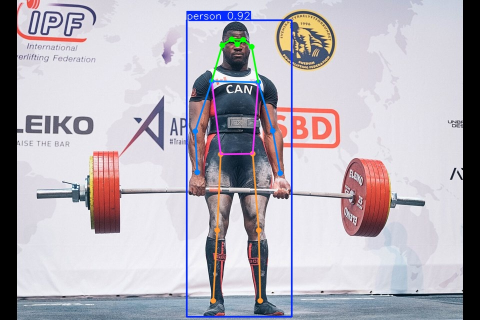

In [10]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path="/content/drive/MyDrive/YOLOv8/4_keypoint_detection/runs/pose/predict5/test.jpg"

img=cv2.imread(img_path)
img = imutils.resize(img, width=480)

cv2_imshow(img)



#VERİLERE PYTHON İLE ERİŞME


0: 448x640 1 person, 232.3ms
Speed: 4.3ms preprocess, 232.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


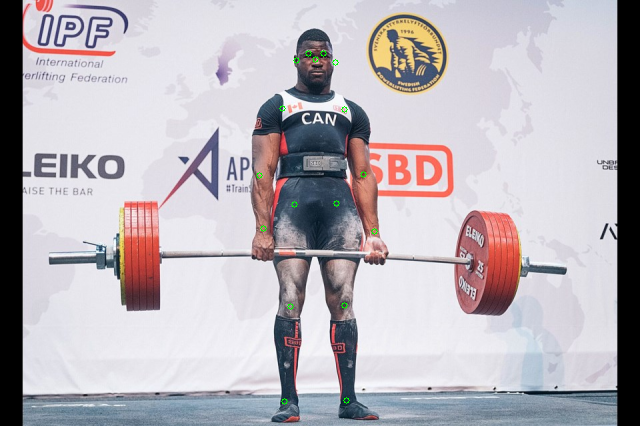

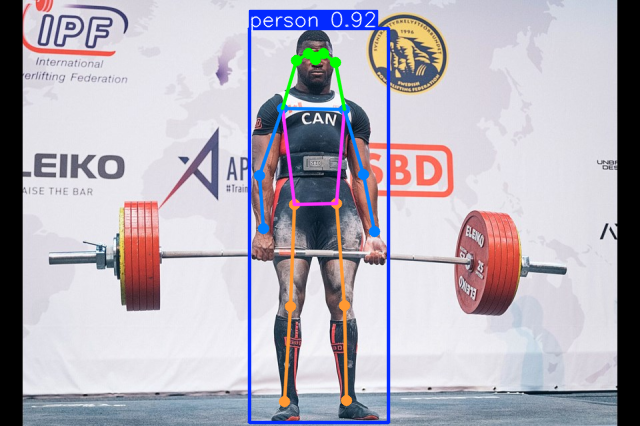

In [15]:
import cv2
import imutils
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


img_path="/content/drive/MyDrive/YOLOv8/4_keypoint_detection/test.jpg"
model_path="/content/drive/MyDrive/YOLOv8/4_keypoint_detection/yolov8n-pose.pt"

img = cv2.imread(img_path)
img = imutils.resize(img ,width=640)

model = YOLO(model_path)
results = model(img)[0]   #model resimdeki bilgilere adresiyle erişebiliyor burda önemli olan modelde 0 ınc indeksteki değerleri döndürttmek
#plotted_img = results.plot()

for result in results:
  points = np.array(result.keypoints.xy.cpu(), dtype="int")
  #print(points)
  for point in points:
    for p in point:
      #print(p)
      cv2.circle(img, ( p[0],p[1] ), 3, (0,255,0),1)

cv2_imshow(img)
#cv2_imshow(plotted_img)



#EĞİTİM // TRAİNİNG

In [17]:
!yolo pose train data=coco8-pose.yaml model=/content/drive/MyDrive/YOLOv8/4_keypoint_detection/yolov8n-pose.pt epochs=25 imgsz=640 batch=8 workers=0 name=yolovv8_keypoint

Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=pose, mode=train, model=/content/drive/MyDrive/YOLOv8/4_keypoint_detection/yolov8n-pose.pt, data=coco8-pose.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=yolovv8_keypoint2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_